In [92]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import mplfinance as mpf
import matplotlib.dates as mdates


In [93]:

# Pobieranie danych o BTC
btc = yf.Ticker("BTC-USD")
hist = btc.history(period="5y")

# Przygotowanie danych do modelu
data = hist.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .95 ))

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training_data_len), :]

x_train=[]
y_train = []

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))


In [94]:
# Budowanie modelu LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Trenowanie modelu
model.fit(x_train, y_train, batch_size=2, epochs=5, verbose=2)

# Przygotowanie danych testowych
test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
# Przewidywanie ceny na przyszłe 30 dni
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

Epoch 1/5


C:\Users\szymo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


839/839 - 13s - 16ms/step - loss: 0.0031
Epoch 2/5
839/839 - 10s - 12ms/step - loss: 9.4634e-04
Epoch 3/5
839/839 - 10s - 12ms/step - loss: 6.3143e-04
Epoch 4/5
839/839 - 11s - 13ms/step - loss: 5.7913e-04
Epoch 5/5
839/839 - 10s - 12ms/step - loss: 5.6665e-04
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['BTC-USD']: IndexError('index 0 is out of bounds for axis 0 with size 0')


C:\Users\szymo\AppData\Local\Temp\ipykernel_23632\474464295.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid.loc[:, 'Predictions'] = predictions


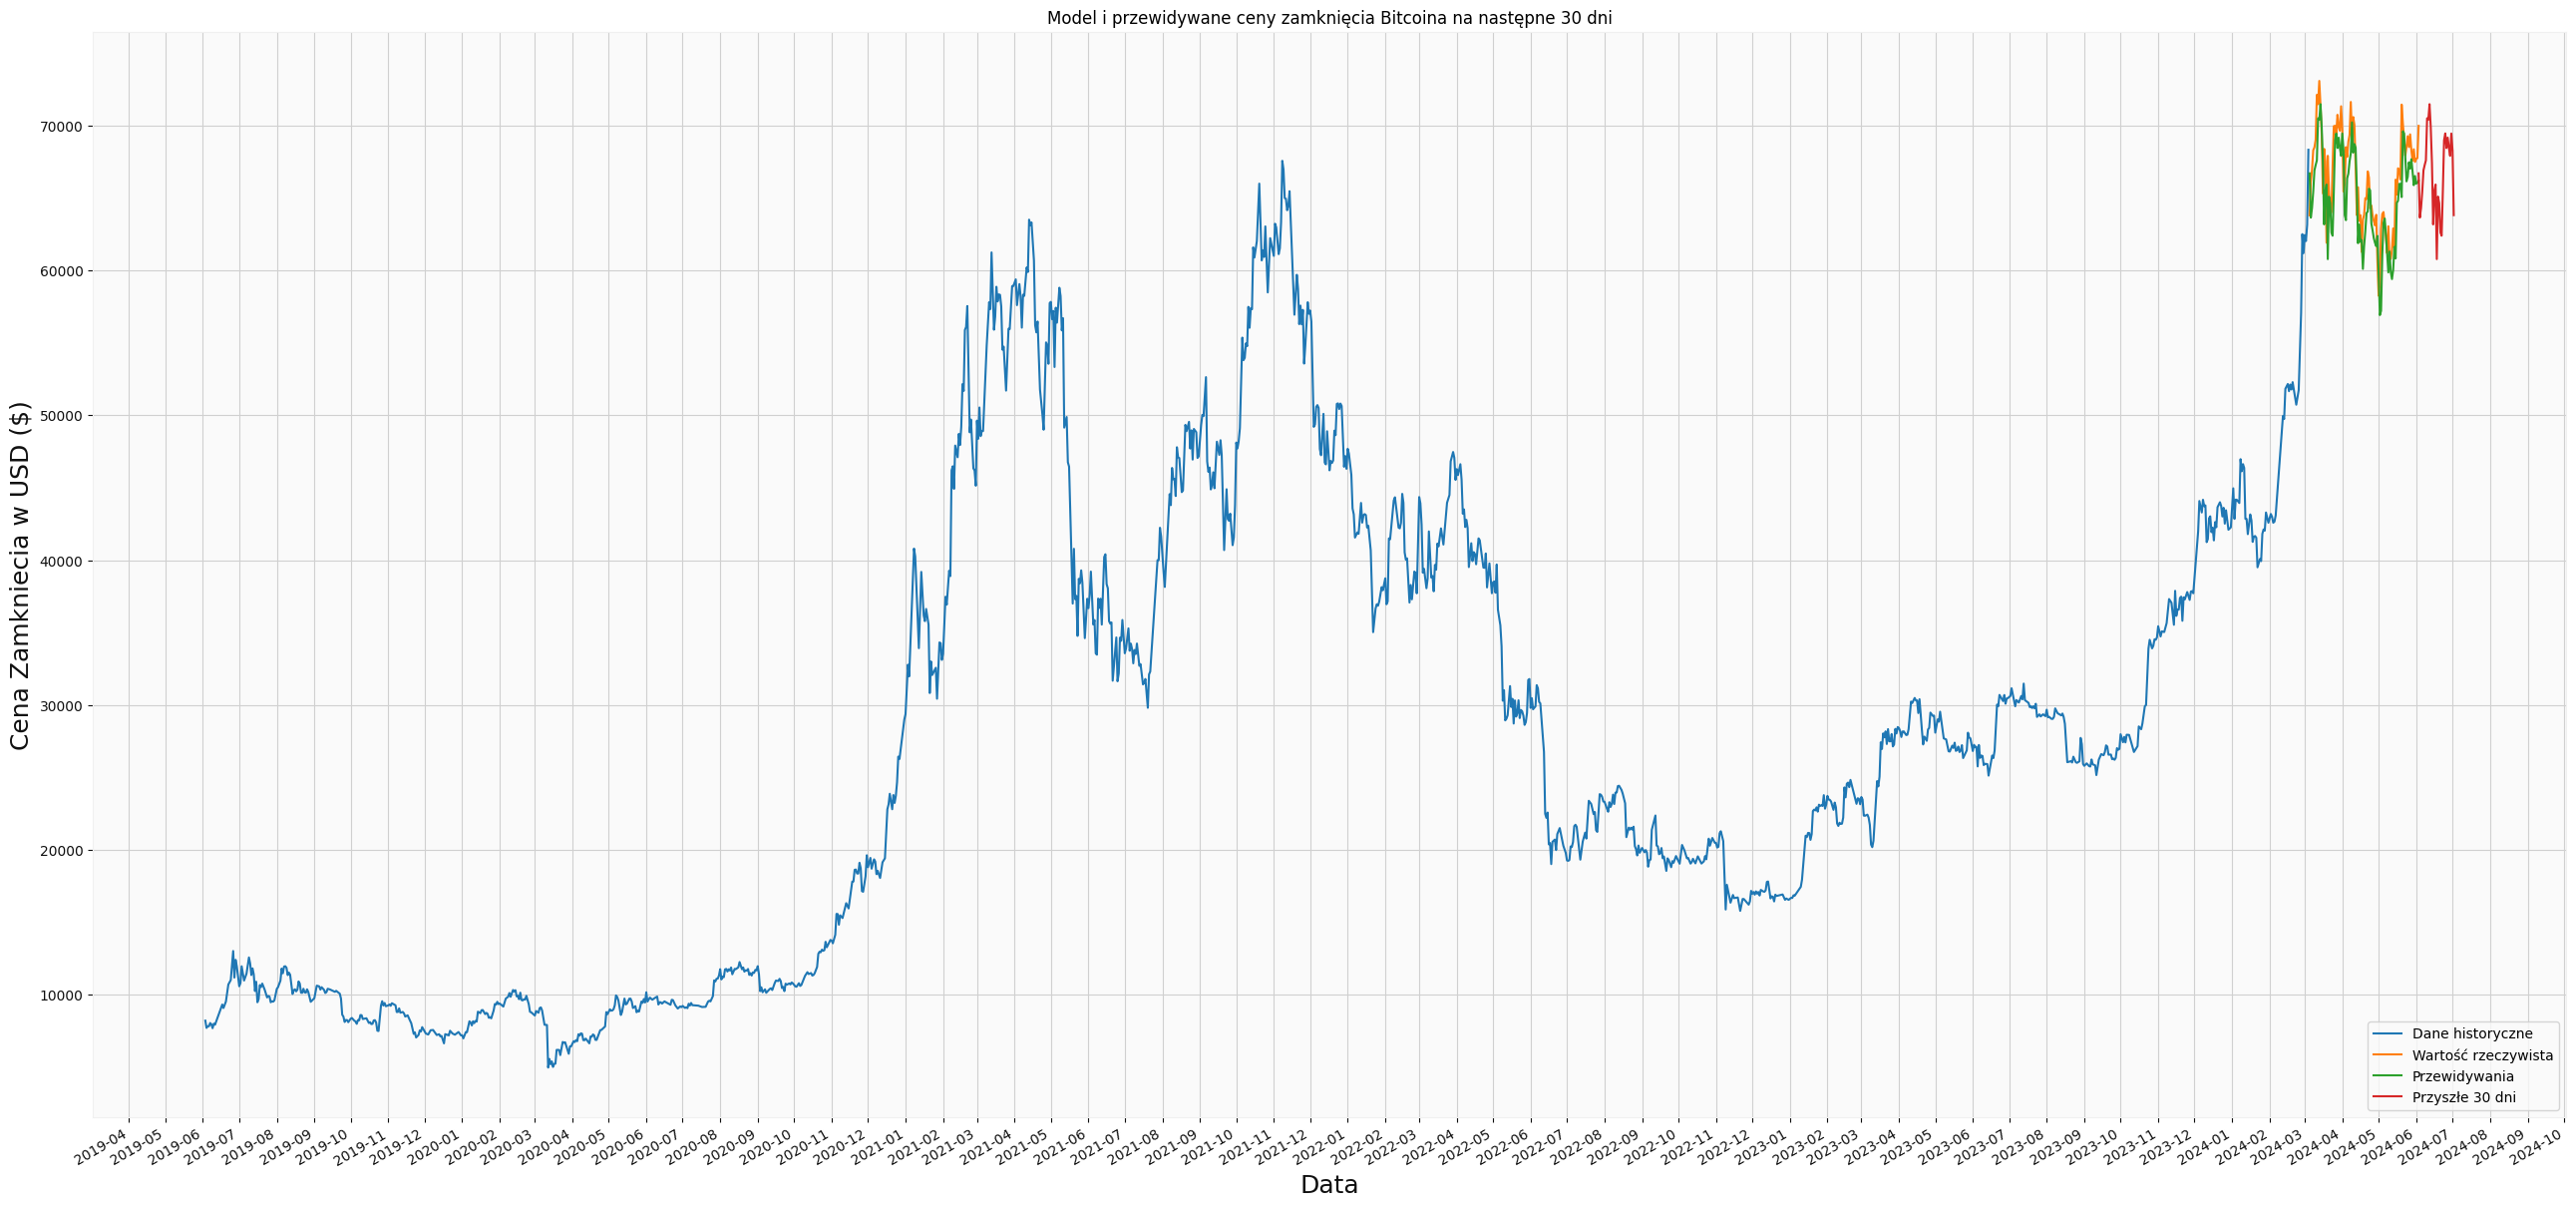

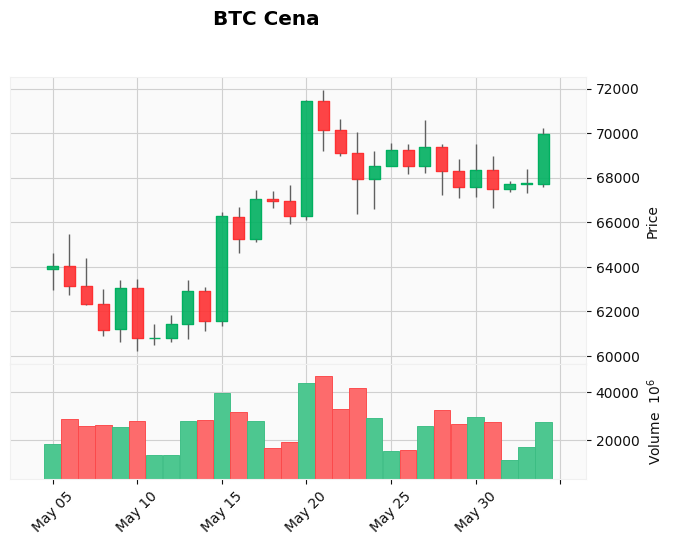

In [95]:

today = datetime.today().strftime('%Y-%m-%d')
today_data = yf.download('BTC-USD', start=today, end=today)

# Create a date range for the next 30 days, starting from today
future_dates = pd.date_range(start=today, periods=30)

# Create a DataFrame with the predicted prices
pred_df = pd.DataFrame(predictions[:30], index=future_dates, columns=['Predicted Close'])

# Prepare the training and validation data
train = data[:training_data_len]
valid = data[training_data_len:]
valid.loc[:, 'Predictions'] = predictions
# Plot the predicted prices and the model results
plt.figure(figsize=(32,16))
plt.title('Model i przewidywane ceny zamknięcia Bitcoina na następne 30 dni')
plt.xlabel('Data', fontsize=18)
plt.ylabel('Cena Zamkniecia w USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.plot(pred_df['Predicted Close'])
plt.legend(['Dane historyczne', 'Wartość rzeczywista', 'Przewidywania', 'Przyszłe 30 dni'], loc='lower right')
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate() # Rotation
plt.show()
# Wyświetlanie wykresu świecowego
mpf.plot(hist[-30:], type='candle', title='BTC Cena', volume=True, style='yahoo')



W kontekście wykresu świecowego, który jest wyświetlany w Twoim kodzie, `volume` odnosi się do wolumenu handlu dla danego okresu. W tym przypadku, jeśli `volume` wynosi 10^6, oznacza to, że w danym okresie czasu (na przykład w ciągu dnia) zostało przeprowadzonych 1 000 000 transakcji.

[*********************100%%**********************]  1 of 1 completed

1 Failed download:


['BTC-USD']: IndexError('index 0 is out of bounds for axis 0 with size 0')


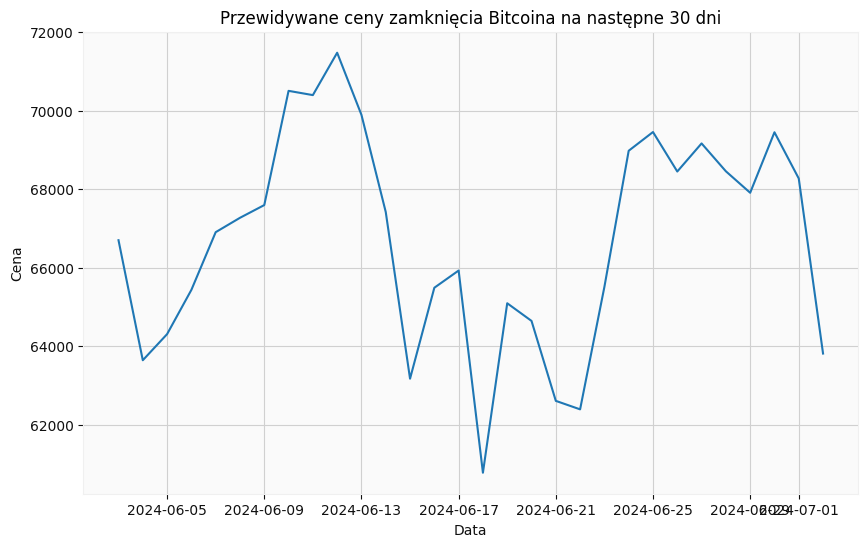

In [96]:

# Get today's date
today = datetime.today().strftime('%Y-%m-%d')
today_data = yf.download('BTC-USD', start=today, end=today)

# Create a date range for the next 30 days, starting from today
future_dates = pd.date_range(start=today, periods=30)

# Create a DataFrame with the predicted prices
pred_df = pd.DataFrame(predictions[:30], index=future_dates, columns=['Predicted Close'])

# Plot the predicted prices
plt.figure(figsize=(10, 6))
plt.plot(pred_df['Predicted Close'])
plt.title('Przewidywane ceny zamknięcia Bitcoina na następne 30 dni')
plt.xlabel('Data')
plt.ylabel('Cena')
plt.show()